In [15]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.autograd import Variable
from torch.utils.data import DataLoader,TensorDataset
import tensorflow
from sklearn.model_selection import train_test_split

In [16]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()
(features_train.shape, features_test.shape,targets_train.shape,targets_test.shape)

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [17]:
# Convert to float32.
features_train = np.array(features_train, np.float32)
features_test = np.array(features_test, np.float32)

In [18]:
# Flatten images to 1-D vector of 784 features (28*28).
features_train_flattened = features_train.reshape(len(features_train),28*28)
features_test_flattened = features_test.reshape(len(features_test),28*28)
(features_train_flattened.shape, features_test_flattened.shape)

((60000, 784), (10000, 784))

In [19]:
# Normalize images value from [0, 255] to [0, 1].
features_train_flattened = features_train_flattened / 255
features_test_flattened = features_test_flattened / 255

In [20]:
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients.
features_train_flattened_tensor = torch.from_numpy(features_train_flattened)
targets_train_tensor = torch.from_numpy(targets_train)

In [21]:
# create feature and targets tensor for test set.
features_test_flattened_tensor = torch.from_numpy(features_test_flattened)
targets_test_tensor = torch.from_numpy(targets_test)

In [22]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [23]:
# Pytorch train and test sets - Tensordataset
train_data = TensorDataset(features_train_flattened_tensor,targets_train_tensor)
test_data = TensorDataset(features_test_flattened_tensor,targets_test_tensor)

In [24]:
# data loader
train_loader = DataLoader(train_data,batch_size=batch_size,shuffle=False)
test_loader = DataLoader(test_data,batch_size=batch_size,shuffle=False)


4


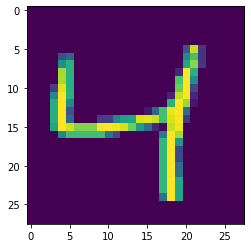

In [30]:
# visualize one of the images in data set
print(targets_train[2])
plt.imshow(features_train[2])
plt.show()

In [26]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        self.linear_func_1 = nn.Linear(input_dim, hidden_dim) 
        self.activation_func_1 = nn.ReLU()
        
        self.linear_func_2 = nn.Linear(hidden_dim, hidden_dim) 
        self.activation_func_2 = nn.ReLU()
        
        self.linear_func_3 = nn.Linear(hidden_dim, output_dim) 
    
    def forward(self, x):
        # Linear function 1
        out = self.linear_func_1(x)
        # Opti function 1
        out = self.activation_func_1(out)
        
        # Linear function 2
        out = self.linear_func_2(out)
        # Non-linearity 2
        out = self.activation_func_2(out)
        
        # Linear function 3
        out = self.linear_func_3(out)
        return out

        

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)
# Cross Entropy Loss
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.02
print(model.parameters())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<generator object Module.parameters at 0x7f63350b1950>


In [27]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        output = model(train)
        # Calculate softmax and cross entropy loss
        loss = error(output, labels)
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                # Forward propagation
                output = model(test)
                # Get predictions from the maximum value
                predicted = torch.max(output.data, 1)[1]
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, loss.data,accuracy))

Iteration: 500 Loss: 0.7357711791992188 Accuracy: 81.41999816894531 %
Iteration: 1000 Loss: 0.49898582696914673 Accuracy: 89.0 %
Iteration: 1500 Loss: 0.5394967198371887 Accuracy: 90.0999984741211 %
Iteration: 2000 Loss: 0.2962166666984558 Accuracy: 91.0999984741211 %
Iteration: 2500 Loss: 0.20671886205673218 Accuracy: 91.87000274658203 %
Iteration: 3000 Loss: 0.3478963077068329 Accuracy: 92.2300033569336 %
Iteration: 3500 Loss: 0.24843592941761017 Accuracy: 92.76000213623047 %
Iteration: 4000 Loss: 0.29024702310562134 Accuracy: 93.36000061035156 %
Iteration: 4500 Loss: 0.38459691405296326 Accuracy: 93.44999694824219 %


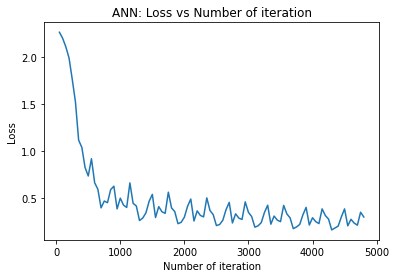

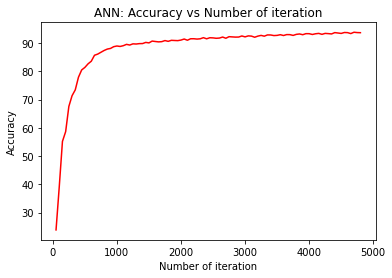

In [28]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()
# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()